# Perceptron

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# create a classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,
                          random_state=41, hypercube=False, class_sep=10)

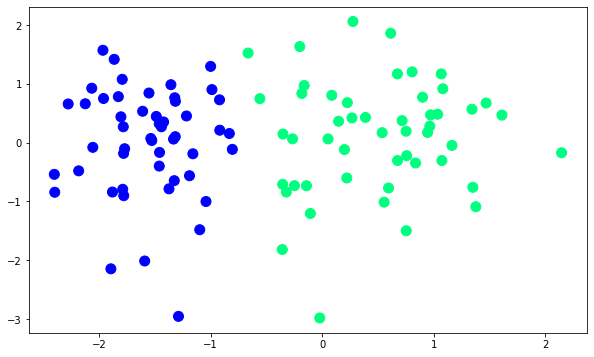

In [2]:
# plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.show()

## Perceptron without Loss function

In [4]:
def step(z):
    return 1 if z > 0 else 0


def perceptron(X, y):
    # insert a column to the 0th position that will act as bias when updating the weights
    X       = np.insert(X, 0, 1, axis=1)
    # initialise the weights
    weights = np.ones(X.shape[1])
    # set the learning rate
    lr      = 0.1
    
    # update the weights
    for i in range(1000):
        # choose a random record/sample
        j       = np.random.randint(0, 100)
        # calculate/predict the result
        y_hat   = step(np.dot(X[j], weights))
        # update the weights
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    # return the intersection and the coefficients
    return weights[0], weights[1:]

In [5]:
intercept_, coef_ = perceptron(X, y)

coef_, intercept_

(array([1.37671326, 0.05091008]), 1.0)

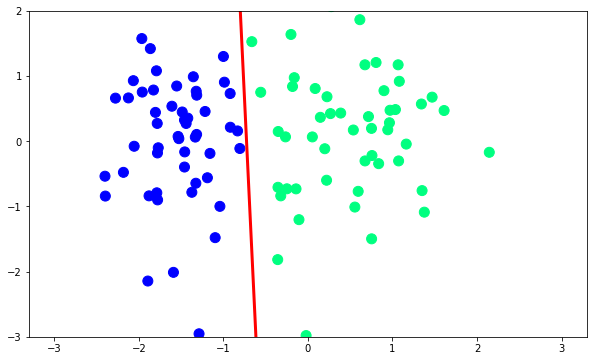

In [6]:
# ax+by+c=0 change this equation to y = mx + b
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

# create data using the m and b values
X_input = np.linspace(-3, 3, 100)
y_input = m * X_input + b

# visualise the data
plt.figure(figsize=(10, 6))
plt.plot(X_input, y_input, color="red", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)
plt.show()

In [18]:
class Perceptron:
    """
    Perceptron trick for binary classification problem.
    """
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs        = epochs
        self.weights       = None
        self.intercept_    = None
        self.coef_         = None
        
    def _step(self, z):
        return 1 if z > 0 else 0
        
    def fit(self, X, y):
        # insert a column to the 0th position that will act as bias when updating the weights
        X = np.insert(X, 0, 1, axis=1)
        # initialise the weights
        self.weights = np.ones(X.shape[1])
        
        for epoch in range(self.epochs):
            # choose a random record/sample
            j       = np.random.randint(0, y.shape[0])
            # calculate/predict the result
            y_hat   = self._step(np.dot(X[j], self.weights))
            # update the weights
            self.weights = self.weights + self.learning_rate * (y[j] - y_hat) * X[j]
            
        self.intercept_, self.coef_ = self.weights[0], self.weights[1:]
    
    def predict(self):
        pass

In [19]:
perceptron = Perceptron()

perceptron.fit(X, y)

In [20]:
perceptron.intercept_

0.8999999999999999

In [21]:
perceptron.coef_

array([1.32269372, 0.21540874])

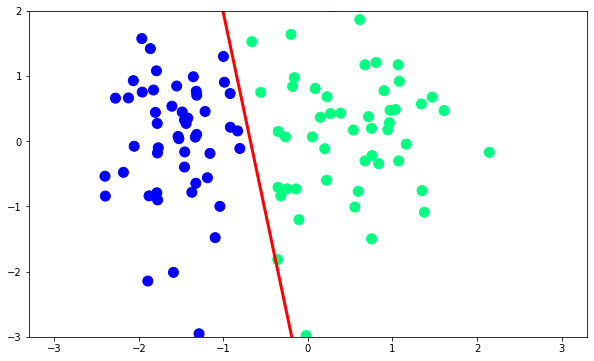

In [22]:
# ax+by+c=0 change this equation to y = mx + b
m = -(perceptron.coef_[0]/perceptron.coef_[1])
b = -(perceptron.intercept_/perceptron.coef_[1])

# create data using the m and b values
X_input = np.linspace(-3, 3, 100)
y_input = m * X_input + b

# visualise the data
plt.figure(figsize=(10, 6))
plt.plot(X_input, y_input, color="red", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)
plt.show()

## Perceptron With Loss Function

In [5]:
def perceptron(X, y):
    w1 = w2 = b = 1
    lr = 0.1
    epochs = 1000
    
    for j in range(epochs):
        for i in range(X.shape[0]):
            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b
            
            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b  = b + lr*y[i]
                
    return w1, w2, b

In [6]:
w1, w2, b = perceptron(X, y)

w1, w2, b

(0.9243919310080415, 0.15134060762638524, 1.4000000000000004)

In [7]:
# slope of the line
m = -(w1/w2)
# intersection of the line
c = -(b/w2)

m, c

(-6.108023124170937, -9.250656660875727)

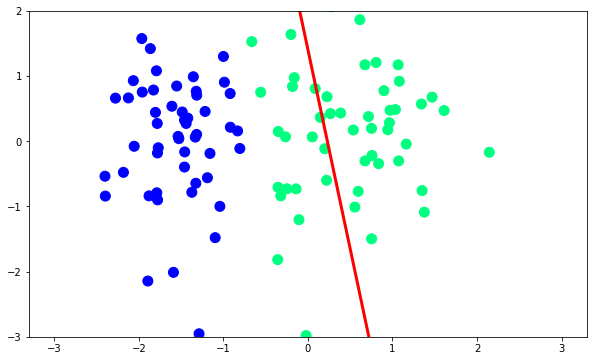

In [10]:
# create data using the m and b values
X_input = np.linspace(-3, 3, 100)
y_input = m * X_input + b

# visualise the data
plt.figure(figsize=(10, 6))
plt.plot(X_input, y_input, color="red", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)
plt.show()